## Moments

In [3]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import brfss

import thinkstats2
import thinkplot

In [4]:
df = brfss.ReadBrfss(nrows=None)

In [5]:
female = df[df.sex==2]
female_heights = female.htm3.dropna()
mean, std = female_heights.mean(), female_heights.std()

In [7]:
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

In [9]:
RawMoment(female_heights, 1), RawMoment(female_heights, 2), RawMoment(female_heights, 3)

(163.22347500412215, 26694.74321809659, 4374411.46250422)

In [10]:
def Mean(xs):
    return RawMoment(xs, 1)

Mean(female_heights)

163.22347500412215

In [11]:
def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)

In [13]:
CentralMoment(female_heights, 1), CentralMoment(female_heights, 2), CentralMoment(female_heights, 3)

(-9.903557940122168e-14, 52.84042567529328, -46.88569506887073)

In [14]:
def Var(xs):
    return CentralMoment(xs, 2)
Var(female_heights)

52.84042567529328

In [15]:
def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k)/ std**k

In [16]:
StandardizedMoment(female_heights,1),StandardizedMoment(female_heights,2),StandardizedMoment(female_heights,3)

(-1.3624108479155668e-14, 1.0, -0.1220649274510512)

In [30]:
def Skewness(xs):
    return StandardizedMoment(xs, 3)
Skewness(female_heights)

-0.1220649274510512

In [18]:
def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

In [19]:
Mean(female_heights), Median(female_heights)

(163.22347500412215, 163.0)

In [27]:
def PearsonMedianSkewness(xs):
    median =Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median)/std
    return gp

In [28]:
PearsonMedianSkeness(female_heights)

0.0922289055190516

### Birth weights

In [22]:
import first

In [23]:
live, firsts, others = first.MakeFrames()

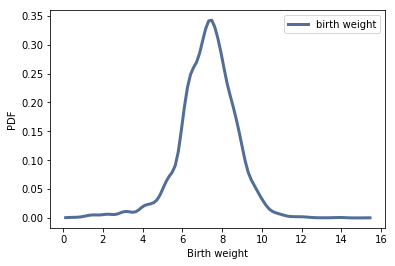

In [24]:
birth_weights = live.totalwgt_lb.dropna()
pdf = thinkstats2.EstimatedPdf(birth_weights)
thinkplot.Pdf(pdf, label='birth weight')
thinkplot.Config(xlabel='Birth weight', ylabel='PDF')

In [25]:
Mean(birth_weights), Median(birth_weights)

(7.265628457623368, 7.375)

In [31]:
Skewness(birth_weights), PearsonMedianSkewness(birth_weights)

(-0.5895062687577989, -0.23300028954731833)

### Adult weights

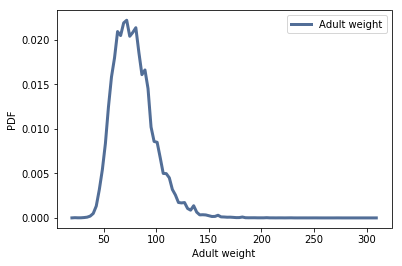

In [33]:
adult_weights = df.wtkg2.dropna()
pdf = thinkstats2.EstimatedPdf(adult_weights)
thinkplot.Pdf(pdf, label='Adult weight')
thinkplot.Config(xlabel='Adult weight', ylabel='PDF')

In [34]:
Mean(adult_weights), Median(adult_weights)

(78.99245299687198, 77.27)

In [36]:
Skewness(adult_weights), PearsonMedianSkewness(adult_weights)

(1.054840012109306, 0.2643673381618039)